In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

In [2]:
 # Read the credit data file into a Pandas DataFrame
credit_data=Path("/Resources/credit_dataset_ML5b.csv")
    
credit_df=pd.read_csv(credit_data, low_memory=False)

In [3]:
credit_df.head()

,GENDER,CAR,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FAMILY SIZE,AGE,INCOME,SOCIAL_STABILITY,SOCIAL_EXPOSURE,SOCIAL_QUALITY,LOAN_SOCIAL_VAR,LOAN_APPROVAL
0,M,Y,Working,Secondary / secondary special,Married,House / apartment,2,59,57583,0.32,0.12,0.87,0.033408,1
1,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,26317,0.32,0.56,0.10,0.017920,0
2,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,20458,0.31,0.21,0.03,0.001953,0
3,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,29275,0.31,0.11,0.87,0.029667,0
4,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,41992,0.32,0.12,0.10,0.003840,1


In [4]:
credit_df = credit_df.dropna().copy()

In [5]:
credit_df

,GENDER,CAR,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FAMILY SIZE,AGE,INCOME,SOCIAL_STABILITY,SOCIAL_EXPOSURE,SOCIAL_QUALITY,LOAN_SOCIAL_VAR,LOAN_APPROVAL
0,M,Y,Working,Secondary / secondary special,Married,House / apartment,2,59,57583,0.32,0.12,0.87,0.033408,1
1,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,26317,0.32,0.56,0.10,0.017920,0
2,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,20458,0.31,0.21,0.03,0.001953,0
3,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,29275,0.31,0.11,0.87,0.029667,0
4,F,N,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,52,41992,0.32,0.12,0.10,0.003840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,F,N,State servant,Secondary / secondary special,Married,House / apartment,2,52,25200,0.31,0.21,0.03,0.032364,0
11967,F,N,State servant,Secondary / secondary special,Married,House / apartment,2,52,45946,0.31,0.11,0.87,0.017360,1
11968,F,N,State servant,Secondary / secondary special,Married,House / apartment,2,52,21751,0.32,0.12,0.10,0.001953,0
11969,F,N,State servant,Secondary / secondary special,Married,House / apartment,2,52,58791,0.37,0.56,0.03,0.029667,1


In [6]:
# Review the data types associated with the columns
credit_df.dtypes

GENDER               object
CAR                  object
INCOME_TYPE          object
EDUCATION_TYPE       object
FAMILY_TYPE          object
HOUSE_TYPE           object
FAMILY SIZE           int64
AGE                   int64
INCOME                int64
SOCIAL_STABILITY    float64
SOCIAL_EXPOSURE     float64
SOCIAL_QUALITY      float64
LOAN_SOCIAL_VAR     float64
LOAN_APPROVAL         int64
dtype: object

In [7]:
credit_df["LOAN_APPROVAL"] = credit_df["LOAN_APPROVAL"].astype('object')

In [8]:
credit_df.dtypes

GENDER               object
CAR                  object
INCOME_TYPE          object
EDUCATION_TYPE       object
FAMILY_TYPE          object
HOUSE_TYPE           object
FAMILY SIZE           int64
AGE                   int64
INCOME                int64
SOCIAL_STABILITY    float64
SOCIAL_EXPOSURE     float64
SOCIAL_QUALITY      float64
LOAN_SOCIAL_VAR     float64
LOAN_APPROVAL        object
dtype: object

In [9]:
# Create a list of categorical variables 
categorical_variables = list(credit_df.dtypes[credit_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['GENDER',
 'CAR',
 'INCOME_TYPE',
 'EDUCATION_TYPE',
 'FAMILY_TYPE',
 'HOUSE_TYPE',
 'LOAN_APPROVAL']

In [10]:
# Imports
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Encode categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(credit_df[categorical_variables])

In [12]:
# Create a DataFrame with the encoded variables
# The column names should match those of the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Display the DataFrame
encoded_df.head()

C:\Users\owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,GENDER_F,GENDER_M,CAR_N,CAR_Y,INCOME_TYPE_Commercial associate,INCOME_TYPE_State servant,INCOME_TYPE_Student,INCOME_TYPE_Working,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,...,FAMILY_TYPE_Unmarried,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents,LOAN_APPROVAL_0,LOAN_APPROVAL_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
 # Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = credit_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,FAMILY SIZE,AGE,INCOME,SOCIAL_STABILITY,SOCIAL_EXPOSURE,SOCIAL_QUALITY,LOAN_SOCIAL_VAR
0,2,59,57583,0.32,0.12,0.87,0.033408
1,1,52,26317,0.32,0.56,0.10,0.017920
2,1,52,20458,0.31,0.21,0.03,0.001953
3,1,52,29275,0.31,0.11,0.87,0.029667
4,1,52,41992,0.32,0.12,0.10,0.003840


In [14]:
# Using the Pandas concat function, combine the DataFrames the contain the encoded categorical data and the numerical data
cc_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# Reveiw the DataFrame
cc_df.head()

,FAMILY SIZE,AGE,INCOME,SOCIAL_STABILITY,SOCIAL_EXPOSURE,SOCIAL_QUALITY,LOAN_SOCIAL_VAR,GENDER_F,GENDER_M,CAR_N,...,FAMILY_TYPE_Unmarried,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents,LOAN_APPROVAL_0,LOAN_APPROVAL_1
0,2,59,57583,0.32,0.12,0.87,0.033408,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,52,26317,0.32,0.56,0.10,0.017920,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,52,20458,0.31,0.21,0.03,0.001953,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,52,29275,0.31,0.11,0.87,0.029667,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,52,41992,0.32,0.12,0.10,0.003840,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
 # Define the target set y using the LOAN_APPROVAL_True column
y = cc_df["LOAN_APPROVAL_1"].values.reshape(-1,1)

# Display a sample of y
y[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [16]:
# Define features set X by selecting all columns BUT LOAN_APPROVAL_True and LOAN_APPROVAL_False
X = cc_df.drop(columns=["LOAN_APPROVAL_1", "LOAN_APPROVAL_0"])

# Review the features DataFrame
X.head()

,FAMILY SIZE,AGE,INCOME,SOCIAL_STABILITY,SOCIAL_EXPOSURE,SOCIAL_QUALITY,LOAN_SOCIAL_VAR,GENDER_F,GENDER_M,CAR_N,...,FAMILY_TYPE_Married,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Unmarried,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,2,59,57583,0.32,0.12,0.87,0.033408,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,52,26317,0.32,0.56,0.10,0.017920,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,52,20458,0.31,0.21,0.03,0.001953,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,52,29275,0.31,0.11,0.87,0.029667,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,52,41992,0.32,0.12,0.10,0.003840,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
 # Create the StandardScaler instance
scaler = StandardScaler()

In [19]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [20]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [22]:
rf_model.fit(X_train_scaled, y_train)

C:\Users\owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=500, random_state=78)

In [23]:
# Fit the model
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [24]:
predictions = rf_model.predict(X_test_scaled)

In [25]:
#Calculate the confusion matrix
cm=confusion_matrix(y_test, predictions)


In [26]:
display(cm)

array([[ 635,    0],
       [   1, 2357]], dtype=int64)

In [27]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.9996658870698296
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       635
         1.0       1.00      1.00      1.00      2358

    accuracy                           1.00      2993
   macro avg       1.00      1.00      1.00      2993
weighted avg       1.00      1.00      1.00      2993



In [29]:
#features

In [30]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [31]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.8163442531340467, 'INCOME'),
 (0.09244183201450887, 'LOAN_SOCIAL_VAR'),
 (0.02219694232733533, 'SOCIAL_QUALITY'),
 (0.017345103393740093, 'AGE'),
 (0.01294416427600539, 'SOCIAL_EXPOSURE'),
 (0.005670810709400079, 'FAMILY SIZE'),
 (0.005215483632715451, 'SOCIAL_STABILITY'),
 (0.001995249089915808, 'EDUCATION_TYPE_Secondary / secondary special'),
 (0.0019884206868112657, 'INCOME_TYPE_Working'),
 (0.0018130364384835829, 'INCOME_TYPE_Commercial associate'),
 (0.0017867442900647587, 'EDUCATION_TYPE_Higher education'),
 (0.001659381937098254, 'CAR_N'),
 (0.0016515755487920664, 'GENDER_M'),
 (0.001610578867272326, 'CAR_Y'),
 (0.0016016751664499704, 'GENDER_F'),
 (0.001570740634463542, 'FAMILY_TYPE_Married'),
 (0.001392471580188656, 'INCOME_TYPE_State servant'),
 (0.0013891186255270626, 'HOUSE_TYPE_House / apartment'),
 (0.0013249154812281267, 'FAMILY_TYPE_Single / not married'),
 (0.0011401599502636412, 'FAMILY_TYPE_Unmarried'),
 (0.0010382097497898556, 'EDUCATION_TYPE_Incomplete higher')

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

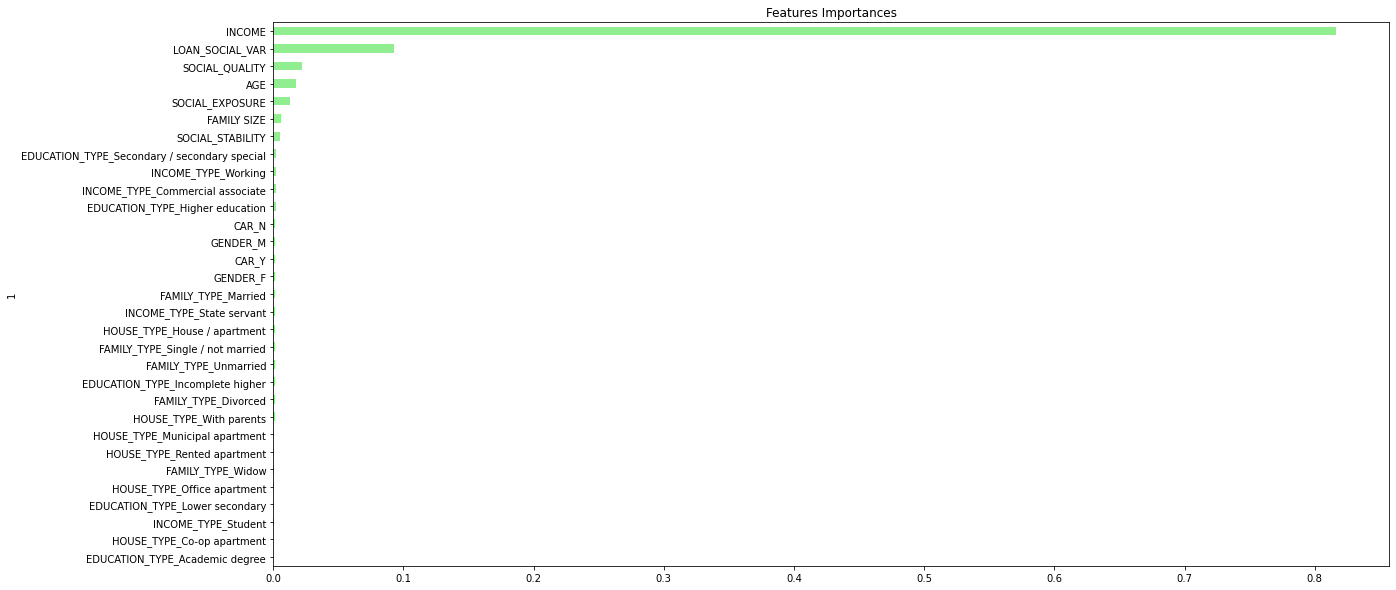

In [32]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(figsize=(20,10), kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [33]:
#Logistic Regression

In [34]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

In [35]:


# Initiate the model instance
logistic_regression_model = LogisticRegression()



In [36]:
model_lr = logistic_regression_model.fit(X_train_scaled, y_train)

C:\Users\owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
predictions_lr = model_lr.predict(X_test_scaled)

In [38]:
#Calculate the confusion matrix
cm_lr=confusion_matrix(y_test, predictions_lr)

In [39]:
display(cm_lr)

array([[ 590,   45],
       [  58, 2300]], dtype=int64)

In [40]:
# Calculating the accuracy score
acc_score_lr = accuracy_score(y_test, predictions_lr)

In [41]:
print(f"Accuracy Score : {acc_score_lr}")
print("Classification Report")
print(classification_report(y_test, predictions_lr))

Accuracy Score : 0.965586368192449
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       635
         1.0       0.98      0.98      0.98      2358

    accuracy                           0.97      2993
   macro avg       0.95      0.95      0.95      2993
weighted avg       0.97      0.97      0.97      2993



In [42]:
#SVM

In [43]:
from sklearn import svm

In [44]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC(probability=True)

In [45]:
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

C:\Users\owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

In [47]:
# Review the model's predicted values
svm_pred[:12]

array([1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [48]:
#Calculate the confusion matrix
cm_svm=confusion_matrix(y_test, svm_pred)

In [49]:
display(cm_svm)

array([[ 565,   70],
       [  68, 2290]], dtype=int64)

In [50]:
# Calculating the accuracy score
acc_score_svm = accuracy_score(y_test, svm_pred)

In [51]:
print(f"Accuracy Score : {acc_score_svm}")
print("Classification Report")
print(classification_report(y_test, svm_pred))

Accuracy Score : 0.9538924156364851
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       635
         1.0       0.97      0.97      0.97      2358

    accuracy                           0.95      2993
   macro avg       0.93      0.93      0.93      2993
weighted avg       0.95      0.95      0.95      2993



In [52]:
#gradientBoost
from sklearn.ensemble import GradientBoostingClassifier
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


In [53]:
 # Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
           X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.866
Accuracy score (validation): 0.856

Learning rate:  0.1
Accuracy score (training): 0.997
Accuracy score (validation): 0.997

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000



In [54]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions_grad = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions_grad, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [55]:
# Calculating the accuracy score
acc_score_grad = accuracy_score(y_test, predictions_grad)
print(f"Accuracy Score : {acc_score_grad}")

Accuracy Score : 0.9996658870698296


In [56]:
cm_grad= confusion_matrix(y_test,predictions_grad)

In [57]:
display(cm_grad)

array([[ 635,    0],
       [   1, 2357]], dtype=int64)

In [58]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions_grad))

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       635
         1.0       1.00      1.00      1.00      2358

    accuracy                           1.00      2993
   macro avg       1.00      1.00      1.00      2993
weighted avg       1.00      1.00      1.00      2993



In [59]:
from sklearn import tree

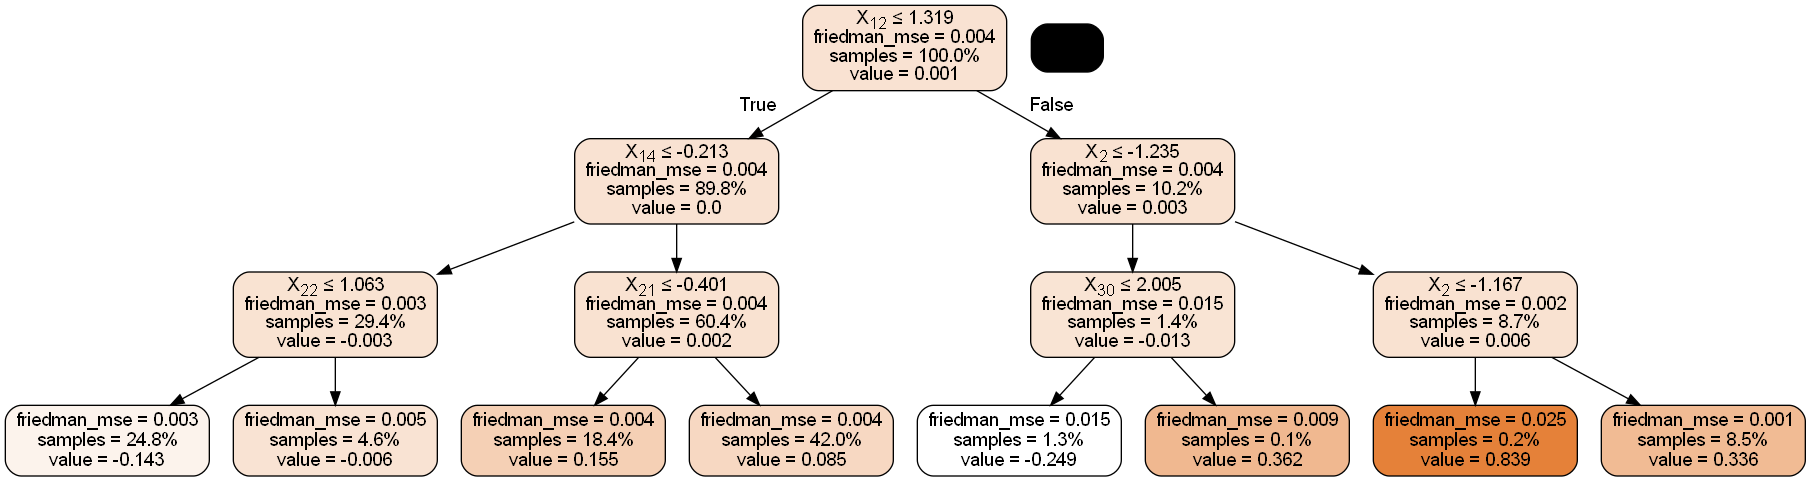

In [60]:
 # Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [61]:
#plot PR curves - random forest and Logisitic regression

In [62]:
from sklearn.metrics import precision_recall_curve

In [63]:
import matplotlib.pyplot as plt

In [64]:
probs_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr, pos_label=1)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf, pos_label=1)

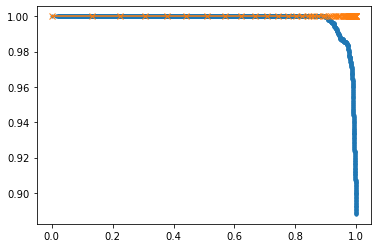

In [65]:

plt.plot(recall_lr, precision_lr, marker='.')
plt.plot(recall_rf, precision_rf, marker='x')

In [66]:
#plot PR curves - SVM and Gradient Boosting classifier

In [67]:
probs_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
probs_grad = classifier.predict_proba(X_test_scaled)[:, 1]
precision_svm, recall_svm, _ = precision_recall_curve(y_test, probs_svm, pos_label=1)
precision_grad, recall_grad, _ = precision_recall_curve(y_test, probs_grad, pos_label=1)

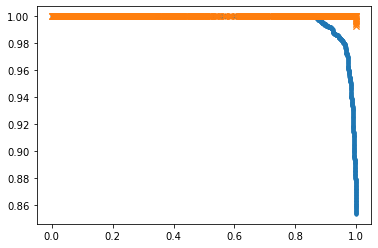

In [68]:

plt.plot(recall_svm, precision_svm, marker='.')
plt.plot(recall_grad, precision_grad, marker='x')